In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [2]:
# import modsim and install if necessary
try:
    from modsim import *
except ImportError:
    print("Download modsim from the course repository at https://github.com/jeffwalton/AE470")

# Constants of the Motion

## Angular Momentum

We define *orbital angular momentum* (or *specific angular momentum* - the angular momentum per unit mass) as 
\begin{equation}
\vec{\mathbf{h}} \triangleq \vec{\mathbf{r}} \times \vec{\mathbf{v}} 
\end{equation}

### By Numerical Simulation

Looking at the simulation from the previous section, we will calculate the angular momentum vector and its magnitude.


In [3]:
import numpy as np
import matplotlib.pyplot as plt


Re-run the simulation in this notebook.

In [4]:
r0 = Vector( 8000, 0, 6000 ) # km
v0 = Vector( 0, 7, 0 ) # km/s

init = State(x=r0.x, y=r0.y, z=r0.z, vx=v0.x, vy=v0.y, vz=v0.z)

system = System(init=init,
                mu=3.986000e+5, # km^3/s^2
                t_end=4 * 60 * 60, # s
               )

show(system)

,value
init,x 8000 y 0 z 6000 vx 0 vy...
mu,398600.0
t_end,14400


In [5]:
def eom_twobodies(t, state, system):
    x, y, z, vx, vy, vz = state  # unpack the state vector
    mu = system.mu
    
    R = Vector(x, y, z)
    r = vector_mag(R)
    V = Vector(vx, vy, vz)
    # print(f"time:{t}, R:[{R.x}, {R.y}, {R.z}]")

    R_dot = V
    R_dotdot = -mu / r**3 * R

    return R_dot.x, R_dot.y, R_dot.z, R_dotdot.x, R_dotdot.y, R_dotdot.z


In [6]:
results, details = run_solve_ivp(system, eom_twobodies, first_step=10.0, rtol=1e-5)

details.message

'The solver successfully reached the end of the integration interval.'

In [7]:
results

,x,y,z,vx,vy,vz
0.0,8000.000000,0.000000,6000.000000,0.000000,7.000000,0.000000
144.0,7966.976498,1006.613873,5975.232374,-0.458123,6.971131,-0.343593
288.0,7868.363165,2004.948870,5901.272374,-0.909916,6.885250,-0.682437
432.0,7705.518542,2986.928036,5779.138907,-1.349290,6.744487,-1.011968
576.0,7480.626127,3944.888051,5610.469595,-1.770716,6.552207,-1.328037
...,...,...,...,...,...,...
13824.0,6803.535777,-5886.842855,5102.651833,2.592307,5.987630,1.944230
13968.0,7150.736512,-5003.532137,5363.052384,2.224698,6.274371,1.668524
14112.0,7442.966873,-4081.800633,5582.225155,1.829755,6.520125,1.372316
14256.0,7676.579840,-3127.962439,5757.434880,1.411372,6.719529,1.058529


Define a python function to compute the magnitude of angular momentum, $ |\vec{\mathbf{h}}| $.

In [8]:
def ang_momentum(r_x, r_y, r_z, v_x, v_y, v_z):
    R = Vector(r_x, r_y, r_z)
    V = Vector(v_x, v_y, v_z)
    H = vector_cross(R,V)
    return vector_mag(H)

We can add a column to the results DataFrame for `h_mag`. To do this we need to apply the the `ang_momentum()` function to each row of `results`. This is done through the [pandas.DataFrame.apply()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) method. Take a look at the next cell. In python, `lambda` is a special in-line function.  You can learn more about lambda functions in the [Real Python](https://realpython.com/) article, [How to Use Python Lambda Functions](https://realpython.com/python-lambda/). In our case, `lambda` allows us to access individual columns of `results` for a specific row. The parameter `axis=1` applies the function to each row. The resulting value is stored in `results` in a column named **h_mag**.

In [9]:
 results['h_mag'] = results.apply(lambda row: ang_momentum(row.x, row.y, row.z, row.vx, row.vy, row.vz), axis=1)

In [10]:
results

,x,y,z,vx,vy,vz,h_mag
0.0,8000.000000,0.000000,6000.000000,0.000000,7.000000,0.000000,70000.000000
144.0,7966.976498,1006.613873,5975.232374,-0.458123,6.971131,-0.343593,69999.991154
288.0,7868.363165,2004.948870,5901.272374,-0.909916,6.885250,-0.682437,69999.978031
432.0,7705.518542,2986.928036,5779.138907,-1.349290,6.744487,-1.011968,70000.006118
576.0,7480.626127,3944.888051,5610.469595,-1.770716,6.552207,-1.328037,69999.862090
...,...,...,...,...,...,...,...
13824.0,6803.535777,-5886.842855,5102.651833,2.592307,5.987630,1.944230,69996.948314
13968.0,7150.736512,-5003.532137,5363.052384,2.224698,6.274371,1.668524,69997.156526
14112.0,7442.966873,-4081.800633,5582.225155,1.829755,6.520125,1.372316,69997.212887
14256.0,7676.579840,-3127.962439,5757.434880,1.411372,6.719529,1.058529,69997.149298


Let's make a plot of $ |\vec{\mathbf{h}}| $ for the whole 4 hours.

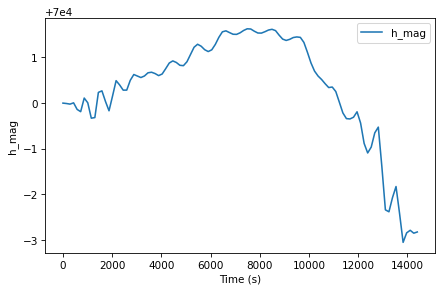

In [11]:
results.h_mag.plot()
decorate(xlabel='Time (s)', ylabel='h_mag')

In [12]:
print(f"The minimum and maximum values of h_mag are: min: {results.h_mag.min()}, max: {results.h_mag.max()}")

The minimum and maximum values of h_mag are: min: 69996.94831395248, max: 70001.6285735783


The magnitude of $ \vec{\mathbf{h}} $ is constant to the precision of the numerical integration.

### Analytically

Take the inertial time-derivative of $ \vec{\mathbf{h}} = \vec{\mathbf{r}} \times \vec{\mathbf{v}}$,
\begin{align}
\dot{\vec{\mathbf{h}}} &= \dot{\vec{\mathbf{r}}} \times \vec{\mathbf{v}} + \vec{\mathbf{r}} \times \dot{\vec{\mathbf{v}}} \\
&= \vec{\mathbf{v}} \times \vec{\mathbf{v}} + \vec{\mathbf{r}} \times \ddot{\vec{\mathbf{r}}} \\
&= \vec{\mathbf{0}} + \vec{\mathbf{r}} \times \ddot{\vec{\mathbf{r}}} \\
\end{align}

Substitute the equation of motion for $ \ddot{\vec{\mathbf{r}}} $

\begin{align}
\dot{\vec{\mathbf{h}}} &= \vec{\mathbf{r}} \times \bigg(-\frac{\mu}{|\vec{\mathbf{r}}|^3}\vec{\mathbf{r}} \bigg)\\
&= -\frac{\mu}{|\vec{\mathbf{r}}|^3}(\vec{\mathbf{r}} \times \vec{\mathbf{r}} )\\
&= \vec{\mathbf{0}} \\
\end{align}

Therefore, the orbital angular momentum is constant; it is conserved.  

Because $ \vec{\mathbf{h}} \triangleq \vec{\mathbf{r}} \times \vec{\mathbf{v}} $ and the definition of the vector cross product, $ \vec{\mathbf{r}} $ and $ \vec{\mathbf{v}} $ are always perpendicular to $ \vec{\mathbf{h}} $.  Since $ \vec{\mathbf{h}} $ is constant, $ \vec{\mathbf{r}} $ and $ \vec{\mathbf{v}} $ remain in the same plane.  This plane is called the *orbital plane*.  **Two-body orbital motion is planar.**

### Exercises
 1. What are the units of $ \vec{\mathbf{h}} $?  What does this say about the orbit?

## Orbital Energy

The *orbital energy* is defined as 
\begin{equation}
\mathcal{E} \triangleq \frac{v^2}{2} - \frac{\mu}{r} = \frac{\vec{\mathbf{v}} \cdot \vec{\mathbf{v}}}{2} - \frac{\mu}{r} 
\end{equation}
where $ v = |\vec{\mathbf{v}}| $ is the orbital speed and $ r = |\vec{\mathbf{r}}| $ is the distance of $m_2$ from $m_1$.  The term $\frac{v^2}{2}$ is the *kinetic energy per unit mass*. $-\frac{\mu}{r}$ is the *two-body gravitational potential energy per unit mass*.


### By Numerical Simulation

Looking at the simulation from the previous section, calculate the orbital energy.


In [13]:
def orbital_energy(r_x, r_y, r_z, v_x, v_y, v_z, system):
    r = vector_mag(Vector(r_x, r_y, r_z))
    v = vector_mag(Vector(v_x, v_y, v_z))
    mu = system.mu
    return (v**2)/2 - mu/r

In [14]:
 results['E'] = results.apply(lambda row: orbital_energy(row.x, row.y, row.z, row.vx, row.vy, row.vz, system), axis=1)

In [15]:
results

,x,y,z,vx,vy,vz,h_mag,E
0.0,8000.000000,0.000000,6000.000000,0.000000,7.000000,0.000000,70000.000000,-15.360000
144.0,7966.976498,1006.613873,5975.232374,-0.458123,6.971131,-0.343593,69999.991154,-15.360006
288.0,7868.363165,2004.948870,5901.272374,-0.909916,6.885250,-0.682437,69999.978031,-15.360016
432.0,7705.518542,2986.928036,5779.138907,-1.349290,6.744487,-1.011968,70000.006118,-15.359996
576.0,7480.626127,3944.888051,5610.469595,-1.770716,6.552207,-1.328037,69999.862090,-15.360094
...,...,...,...,...,...,...,...,...
13824.0,6803.535777,-5886.842855,5102.651833,2.592307,5.987630,1.944230,69996.948314,-15.361805
13968.0,7150.736512,-5003.532137,5363.052384,2.224698,6.274371,1.668524,69997.156526,-15.361726
14112.0,7442.966873,-4081.800633,5582.225155,1.829755,6.520125,1.372316,69997.212887,-15.361687
14256.0,7676.579840,-3127.962439,5757.434880,1.411372,6.719529,1.058529,69997.149298,-15.361728


Make of plot of $ \mathcal{E}$.

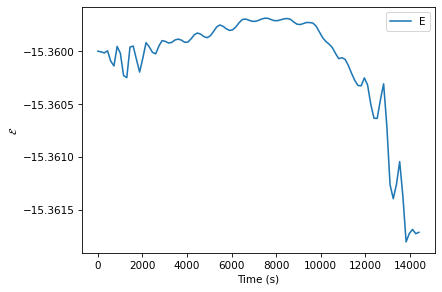

In [16]:
results.E.plot()
decorate(xlabel='Time (s)', ylabel='$\mathcal{E}$')

In [18]:
print(f"The minimum and maximum values of E are: min: {results.E.min()}, max: {results.E.max()}")


The minimum and maximum values of E are: min: -15.361805164172349, max: -15.359687130181262


The orbital energy, $\mathcal{E}$, is constant to the precision of the numerical integration.

### Analytically

Compute time-derivative of 
\begin{equation}
\mathcal{E} \triangleq \frac{v^2}{2} - \frac{\mu}{r} = \frac{\vec{\mathbf{v}} \cdot \vec{\mathbf{v}}}{2} - \frac{\mu}{r} 
\end{equation}

\begin{align}
\dot{\mathcal{E}} &= \vec{\mathbf{v}} \cdot \dot{\vec{\mathbf{v}}}   + \frac{\dot{r}\mu}{r^2}  \\
\end{align}

From the dot product, $ r^2 = \vec{\mathbf{r}} \cdot \vec{\mathbf{r}} $

Taking the derivative, $ 2r\dot{r} = \vec{\mathbf{r}} \cdot \dot{\vec{\mathbf{r}}} + \dot{\vec{\mathbf{r}}} \cdot \vec{\mathbf{r}} = 2(\vec{\mathbf{r}} \cdot \dot{\vec{\mathbf{r}}}) \implies r\dot{r} = \vec{\mathbf{r}} \cdot \dot{\vec{\mathbf{r}}} \implies \dot{r} = \frac{\vec{\mathbf{r}} \cdot \vec{\mathbf{v}}}{r} $ 

Substituting $\dot{r}$ into $ \dot{\mathcal{E}} $ above.

\begin{align}
\dot{\mathcal{E}} &= \vec{\mathbf{v}} \cdot \dot{\vec{\mathbf{v}}}   + \frac{\mu}{r^3}  \vec{\mathbf{r}} \cdot \vec{\mathbf{v}}  \\
\end{align}

and substituting the two-body equation of motion for $ \dot{\vec{\mathbf{v}}} ( = \ddot{\vec{\mathbf{r}}} ) $

\begin{align}
\dot{\mathcal{E}} &= \vec{\mathbf{v}} \cdot ( - \frac{\mu}{|\vec{\mathbf{r}}|^3} \vec{\mathbf{r}} ) + \frac{\mu}{r^3}  \vec{\mathbf{r}} \cdot \vec{\mathbf{v}}  \\
\dot{\mathcal{E}} &= 0
\end{align}


**For the two-body problem, orbital energy is constant.**

## The Eccentricity Vector

This constant of motion is not initially obvious.

Starting from the two-body equation of motion, $ \ddot{\vec{\mathbf{r}}} = - \frac{\mu}{|\vec{\mathbf{r}}|^3} \vec{\mathbf{r}} $, take the cross product of both sides with the angular momentum $ \vec{\mathbf{h}} $.

\begin{equation} 
\ddot{\vec{\mathbf{r}}} \times \vec{\mathbf{h}} = - \frac{\mu}{|\vec{\mathbf{r}}|^3} \vec{\mathbf{r}} \times \vec{\mathbf{h}}
\end{equation}

Since $ \frac{d }{d t}(\dot{\vec{\mathbf{r}}} \times \vec{\mathbf{h}}) = \ddot{\vec{\mathbf{r}}} \times \vec{\mathbf{h}} + \dot{\vec{\mathbf{r}}} \times \dot{\vec{\mathbf{h}}} $, the left-hand side can be written as

\begin{equation}
\ddot{\vec{\mathbf{r}}} \times \vec{\mathbf{h}} = \frac{d }{d t}(\dot{\vec{\mathbf{r}}} \times \vec{\mathbf{h}}) - \dot{\vec{\mathbf{r}}} \times \dot{\vec{\mathbf{h}}}
\end{equation}

We know that the angular momentum is constant ($ \dot{\vec{\mathbf{h}}} = \vec{\mathbf{0}} $), so

\begin{equation}
\ddot{\vec{\mathbf{r}}} \times \vec{\mathbf{h}} = \frac{d }{d t}(\dot{\vec{\mathbf{r}}} \times \vec{\mathbf{h}})
\end{equation}

The right-hand side can be reduced with the definition of $ \vec{\mathbf{h}} = \vec{\mathbf{r}} \times \vec{\mathbf{v}} $, then apply the bac-cab rule, $ \vec{a} \times (\vec{b} \times \vec{c}) = \vec{b}(\vec{a} \cdot \vec{c}) - \vec{c} (\vec{a} \cdot \vec{b}) $. 
\begin{align}
\frac{1}{r^3} \vec{\mathbf{r}} \times \vec{\mathbf{h}} &= \frac{1}{r^3} ( \vec{\mathbf{r}} \times (\vec{\mathbf{r}} \times \vec{\mathbf{v}}) ) \\
 &= \frac{1}{r^3} \bigg( \vec{\mathbf{r}} (\vec{\mathbf{r}} \cdot \vec{\mathbf{v}}) - \vec{\mathbf{v}} (\vec{\mathbf{r}} \cdot \vec{\mathbf{r}}) \bigg) \\
 &= \frac{1}{r^3} \bigg( \vec{\mathbf{r}} (r \dot{r}) - \vec{\mathbf{v}} r^2 \bigg) \\
 &= \frac{\vec{\mathbf{r}} \dot{r} - \vec{\mathbf{v}} r}{r^2} \\
\end{align}

Consider now the time derivative of the unit vector $ \hat{\mathbf{r}} = \frac{\vec{\mathbf{r}}}{r} $,
\begin{equation}
\frac{d}{d t}\bigg(\frac{\vec{\mathbf{r}}}{r} \bigg) =  \frac{d}{d t}\bigg( \vec{\mathbf{r}} \frac{1}{r} \bigg) = \dot{\vec{\mathbf{r}}} \frac{1}{r} - \frac{\dot{r}}{r^2} \vec{\mathbf{r}}  = \frac{r \dot{\vec{\mathbf{r}}} - \vec{\mathbf{r}} \dot{r} }{r^2} = - \frac{\vec{\mathbf{r}} \dot{r} - r \dot{\vec{\mathbf{r}}} }{r^2} = - \frac{\vec{\mathbf{r}} \dot{r} - r \vec{\mathbf{v}} }{r^2}
\end{equation}

Therefore, 
\begin{align}
\frac{1}{r^3} \vec{\mathbf{r}} \times \vec{\mathbf{h}} &= - \frac{d}{d t}\bigg(\frac{\vec{\mathbf{r}}}{r} \bigg)
\end{align}


Substituting back into 
\begin{equation} 
\ddot{\vec{\mathbf{r}}} \times \vec{\mathbf{h}} = - \frac{\mu}{|\vec{\mathbf{r}}|^3} \vec{\mathbf{r}} \times \vec{\mathbf{h}}
\end{equation}

we get
\begin{equation} 
\frac{d }{d t}(\dot{\vec{\mathbf{r}}} \times \vec{\mathbf{h}}) = \frac{d}{d t}\bigg(\mu \frac{\vec{\mathbf{r}}}{r} \bigg)
\end{equation}

or
\begin{equation} 
\frac{d }{d t}\bigg(\dot{\vec{\mathbf{r}}} \times \vec{\mathbf{h}} - \mu \frac{\vec{\mathbf{r}}}{r} \bigg) = \vec{\mathbf{0}}
\end{equation}

This vector is constant
\begin{equation} 
\dot{\vec{\mathbf{r}}} \times \vec{\mathbf{h}} - \mu \frac{\vec{\mathbf{r}}}{r} = \vec{\mathbf{C}}
\end{equation} 

$ \vec{\mathbf{C}} $ is called the Laplace vector named after Pierre-Simon Laplace (1749-1827).


### By Numerical Simulation

Looking at the simulation from the previous section, calculate the orbital energy.
